# Simple Neural Network using Python

A Perceptron Algorithm is implemented for
classification of `Color` of Flower based on it's `Petal Size`.

In [20]:
#importing Modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initialising data Points

In [21]:
#[length, width,color=Blue]
dataB1 = [2,1,0]
dataB2 = [3,1,0]
dataB3 = [2,0.5,0]
dataB4 = [1,1,0]
#[length, width,color=Red]
dataR1 = [3,1.5,1]
dataR2 = [3.55,0.5,1]
dataR3 = [4,1.5,1]
dataR4 = [5.5,1,1]

Our Goal is to find `Color` for Petal having

Length = 4.5;
Width = 1

In [43]:
dataU = [4.5,1] #Target Varibale

#we need to find out color for this data point

#combine all points
data = [dataB1,dataB2,dataB3,dataB4,dataR1,dataR2,dataR3,dataR4]
data2 = [] #dummy data
for i in range(50):
    l = [np.random.randint(1,6),np.random.randint(1,4)]
    data2.append(l)

### Plotting the data Points



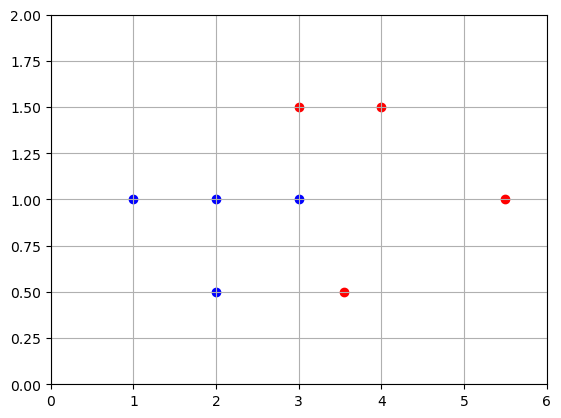

In [22]:
#scatter plot
plt.axis = [0,6,0,6]
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0],point[1],c=color)
    plt.xlim([0, 6])
    plt.ylim([0, 2])

In [8]:
#activation function
def sigmoid(z):
    """Activation Fucntion
    input: z
    output: sigmod(z)
    output range : [0,1]
    """
    return 1 / (1 + np.exp(-z))

## To train The Perceptron
$w_1x_1 + w_2x_2 + b$

where,

>$w_1  = Weight_1$,
$w_2=Weight_2$,
$b = Bias$

>$x_1~and~x_2~are~features;[x_1:Lenght~of~Petal,~ x_2:Width~of~Petal]$

In [9]:
#training Neural Network
def train_nn():
    """Training Neural Network
    returns optimized learning parameters
    """
    #initialising the learnig parameters
    w1 = np.random.randn()*.2-.1
    w2 = np.random.randn()*.2-.1
    b = np.random.randn()*.2-.1 #bias
    learning_rate = 0.2
    iterations = 50000
    
    global cost_hist
    cost_hist = []
    for i in range(iterations):
        #pick random point
        rnd_index = np.random.randint(len(data))
        point = data[rnd_index]
        target = point[2] #y i.e. color of the data
        
        #feed forward
        z = w1*point[0] + w2*point[1] + b
        h = sigmoid(z) #Hypothesis
        
        #cost function
        cost = (h-target)**2 #squared error
        
        cost_hist.append(cost)
            
        #---------------Gradient Descent starts Here---------------
        
        #calculatin gradient of cost function
        
        #1.dcost/dpred
        dcost_dpred = 2*(h-target)
        
        #2.dpred/dz
        dpred_dz = sigmoid(z)*(1-sigmoid(z))
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        #partial derivative using chain rule
        dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
        dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
        dcost_db = dcost_dpred * dpred_dz * dz_db
        
        #updating learnig parametets 
        w1 -= learning_rate*dcost_dw1
        w2 -= learning_rate*dcost_dw2
        b -= learning_rate*dcost_db
        
    return [w1,w2,b]

In [10]:
#calling the function
param = train_nn()

### Prediction

In [18]:
predict = sigmoid(param[0]*dataU[0] + param[1]*dataU[1] + param[2]*1)
predict

0.999973061699346

So the unknown Petal i.e
[4.5,1], the color is predicted to be a `RED`.

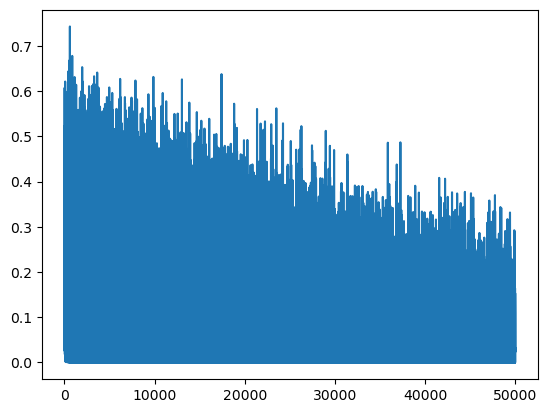

In [11]:
#plotting the cost function
plt.plot(cost_hist)

In [12]:
print(f"w1: {param[0]}\nw2: {param[0]}\nb: {param[0]}")

w1: 6.958316974564434
w2: 6.958316974564434
b: 6.958316974564434


### Testing

In [16]:
#Testing model prediction for different random points

for i in range(len(data)):
    point = data[i]
    print(point)
    
    z = point[0]*param[0] + point[1]*param[1] + param[2]
    pred = sigmoid(z)
    print('pred:{}'.format(pred))

[2, 1, 0]
pred:0.0005299676359701523
[3, 1, 0]
pred:0.35804775730351246
[2, 0.5, 0]
pred:9.011745639382499e-05
[1, 1, 0]
pred:5.041046315999416e-07
[3, 1.5, 1]
pred:0.7664358984709498
[3.55, 0.5, 1]
pred:0.8132222089230234
[4, 1.5, 1]
pred:0.999710368504959
[5.5, 1, 1]
pred:0.9999999500350936


### Conclusion
our model parameters are:

$w_1~=~7.114531835117446$

$w_1~=~3.6079994527650636$

$b~=~-25.10145818157328$